In [66]:
import numpy as np
import cv2
%matplotlib inline
from matplotlib import pyplot as plt

np.random.seed(42)

In [68]:
video_input = cv2.VideoCapture('traffic_video2.mp4')

# Randomly select 30 frames
frameIds = video_input.get(cv2.CAP_PROP_FRAME_COUNT) * np.random.uniform(size=30)

# Store selected frames in an array
frames = []
for fid in frameIds:
    video_input.set(cv2.CAP_PROP_POS_FRAMES, fid)
    ret, frame = video_input.read()
    frames.append(frame)
    
video_input.release()

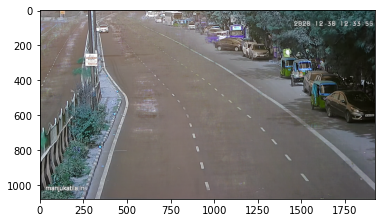

In [69]:
# Calculate the median along the time axis
medianFrame = np.median(frames, axis=0).astype(dtype=np.uint8)
plt.imshow(medianFrame)

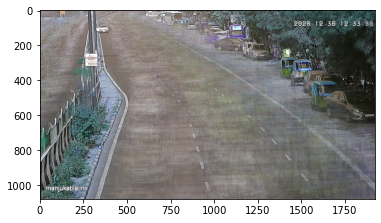

In [70]:
# Calculate the average along the time axis
avgFrame = np.average(frames, axis=0).astype(dtype=np.uint8)
plt.imshow(avgFrame)

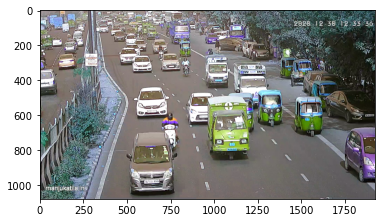

In [71]:
sample_frame=frames[0]
plt.imshow(sample_frame)

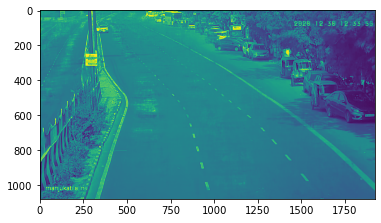

In [72]:
grayMedianFrame = cv2.cvtColor(medianFrame, cv2.COLOR_BGR2GRAY)
plt.imshow(grayMedianFrame)

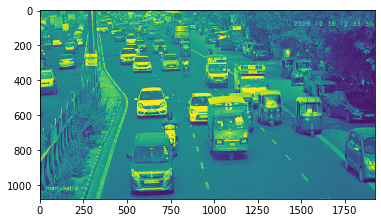

In [73]:
graySample=cv2.cvtColor(sample_frame, cv2.COLOR_BGR2GRAY)
plt.imshow(graySample)

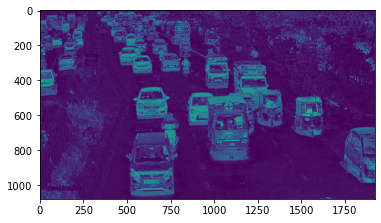

In [74]:
dframe = cv2.absdiff(graySample, grayMedianFrame)
plt.imshow(dframe)

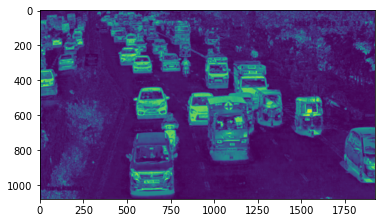

In [75]:
blurred = cv2.GaussianBlur(dframe, (11,11), 0)
plt.imshow(blurred)

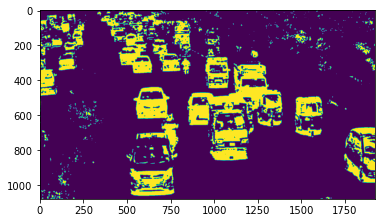

In [76]:
ret, tframe= cv2.threshold(blurred,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
plt.imshow(tframe)

In [78]:
(cnts, _) = cv2.findContours(tframe.copy(), cv2.RETR_EXTERNAL, 
                             cv2 .CHAIN_APPROX_SIMPLE)

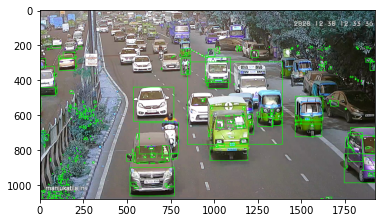

In [79]:
for cnt in cnts:
    x,y,w,h = cv2.boundingRect(cnt)
    if y > 200:  #Disregard item that are the top of the picture
        cv2.rectangle(sample_frame,(x,y),(x+w,y+h),(0,255,0),2)

plt.imshow(sample_frame)

In [81]:
writer = cv2.VideoWriter("traffic_video2", 
                         cv2.VideoWriter_fourcc(*"MP4V"), 30,(640,480))

In [87]:
import cv2
from tracker import *

In [88]:
# Create tracker object
tracker = EuclideanDistTracker()


In [89]:
video_input = cv2.VideoCapture("traffic_video2.mp4")
#Object detection from Stable camera
object_detector = cv2.createBackgroundSubtractorMOG2(history=100,varThreshold=40)


while True:
    ret, frame = video_input.read()
    #height, width, _ = frame.shape
    #print(height, width)
    # Extract Region of interest
    #roi = frame[100:1080 ,100: 1920]
    #object detection
    mask = object_detector.apply(roi)
    
    # 1. Object Detection
    mask = object_detector.apply(roi)
    _, mask = cv2.threshold(mask, 254, 255, cv2.THRESH_BINARY)
    
    contours, _ = cv2.findContours(mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    detections = []
    for cnt in contours:
        #Calculate area and remove small elements
        area = cv2.contourArea(cnt)
        if area > 200:
            #cv2.drawContours(roi, [cnt], -1, (0, 255, 0), 2)
            x, y, w, h = cv2.boundingRect(cnt)

            #cv2.rectangle(roi, (x, y), (x + w, y + h), (0, 255, 0), 3)
            detections.append([x, y, w, h])
    #print(detections)
    
    # 2. Object Tracking
    boxes_ids = tracker.update(detections)
    for box_id in boxes_ids:
        x, y, w, h, id = box_id
        cv2.putText(roi, str(id), (x, y-15), cv2.FONT_HERSHEY_PLAIN, 2, (255, 0, 0), 2)
        cv2.rectangle(roi, (x, y), (x + w, y + h), (0, 255, 0), 3)
        
    
    
    
    
    cv2.imshow("Frame", frame)
    cv2.imshow("Roi", roi)
    cv2.imshow("Mask", mask )
    key = cv2.waitKey(30)
    if key==27:
              break
video_input.release()
cv2.destroyAllWindows()